<a href="https://colab.research.google.com/github/arnav307/final_assignment_ai/blob/main/2462287_Arnav_Ghimire_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Choosing a Dataset:

Dataset Selected: Healthcare Dataset — Kaggle by prasad22
Access Link: https://www.kaggle.com/datasets/prasad22/healthcare-dataset

2.Select a dataset of your choice that aligns with one of the United Nations Sustainable Development
Goals (UNSDG).
This dataset can be linked to UN SDG 3: Good Health and Well‑Being, which aims to ensure healthy lives and promote well‑being for all at all ages.

 Provide a detailed description, including:

(a) When and by whom the dataset was created.

This Healthcare Dataset was created and uploaded by the Kaggle user prasad22.
(b) How and from where the dataset was accessed.
The dataset was accessed directly from Kaggle’s dataset repository at the provided link.

(c) How it aligns with the chosen UNSDG.
This dataset can be linked to UN SDG 3: Good Health and Well‑Being, which aims to ensure healthy lives and promote well‑being for all at all ages. The dataset contains patient health and hospital administrative information, enabling analysis of healthcare trends, resource usage, and access to services — all relevant to monitoring and improving health outcomes.

(d) List all attributes (columns) with brief descriptions.
Feature	Description
1) Name: This column represents the name of the patient associated with the healthcare record.

2)Age: The age of the patient at the time of admission, expressed in years.

3)Gender: Indicates the gender of the patient, either "Male" or "Female."

4)Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

5)Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

6)Date of Admission: The date on which the patient was admitted to the healthcare facility.

7)Doctor: The name of the doctor responsible for the patient's care during their admission.

8)Hospital: Identifies the healthcare facility or hospital where the patient was admitted.

9)Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."

10)Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
11)Room Number: The room number where the patient was accommodated during their admission.

12)Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

13)Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

14)Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."

15)Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

• Identify 2–3 potential questions the dataset could help answer.

->Which patient attributes (Age, Gender, Blood Type, Admission Type) are most associated with abnormal test results?
Does the type of medical condition influence the probability of abnormal test results?
Can we predict a patient’s Test Results based on other features like Age, Gender, Medical Condition, and Admission Type?





# Healthcare Classification Project

## 1.3 Objective
The objective of this analysis is to build a predictive classification model that estimates the target categorical variable (`Test Results`) based on the given features in the dataset (`Gender`, `Blood Type`, `Medical Condition`, `Admission Type`, `Medication`, `Billing Amount`).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE


## 2. Methodology

### 2.1 Data Preprocessing
Before building the model, the data was cleaned. We filtered the target variable to remove 'Inconclusive' results, keeping only 'Normal' and 'Abnormal'. We also handled missing values (if any) and performed scaling on numerical features.

In [8]:
# 1. Load the dataset
df = pd.read_csv('/content/healthcare_dataset.csv')

# 2. Filter Test Results
df = df[df['Test Results'].isin(['Normal', 'Abnormal'])]

# 3. Select Features
selected_features = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Billing Amount']
target = 'Test Results'
df = df[selected_features + [target]]

# 4. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 5. Encoding Categorical Variables
# OneHotEncoding for categorical features
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Label Encoding for Target Variable
le = LabelEncoder()
df['Test Results'] = le.fit_transform(df['Test Results'])
print(f"Target classes: {le.classes_}")

# 6. Scaling Numerical Features
scaler = StandardScaler()
# Billing Amount is numerical
df['Billing Amount'] = scaler.fit_transform(df[['Billing Amount']])



print("\nData shape after preprocessing:", df.shape)
df.head()

Missing values:
 Gender               0
Blood Type           0
Medical Condition    0
Admission Type       0
Medication           0
Billing Amount       0
Test Results         0
dtype: int64
Target classes: ['Abnormal' 'Normal']

Data shape after preprocessing: (37144, 21)


,Billing Amount,Test Results,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,-0.466779,1,True,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,0.172721,1,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0.872375,0,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
4,-0.791348,0,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
5,1.591754,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


### 2.2 Exploratory Data Analysis (EDA)
EDA was performed using visualizations to understand the data distribution and relationships.

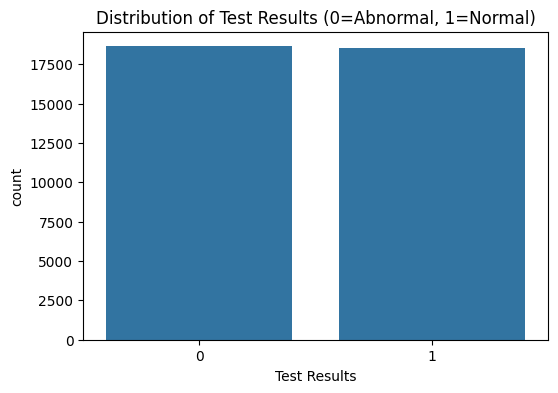

This indicates that the dataset is well balanced, with no significant class imbalance between normal and abnormal cases.


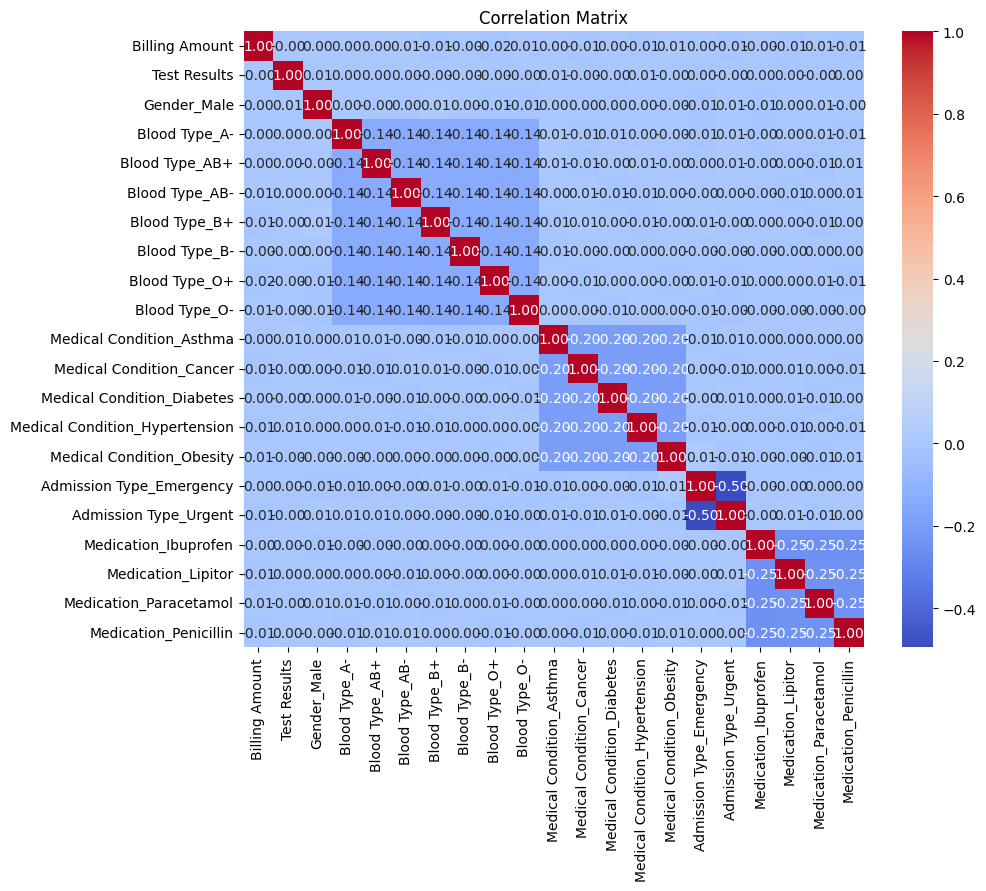

The majority of features show very low correlation values, indicating minimal multicollinearity in the dataset.


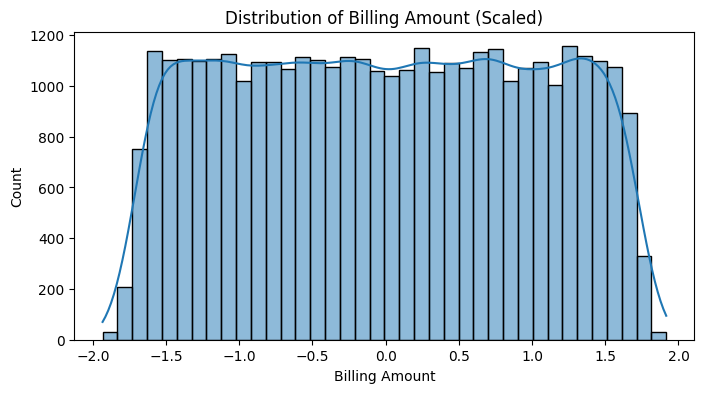

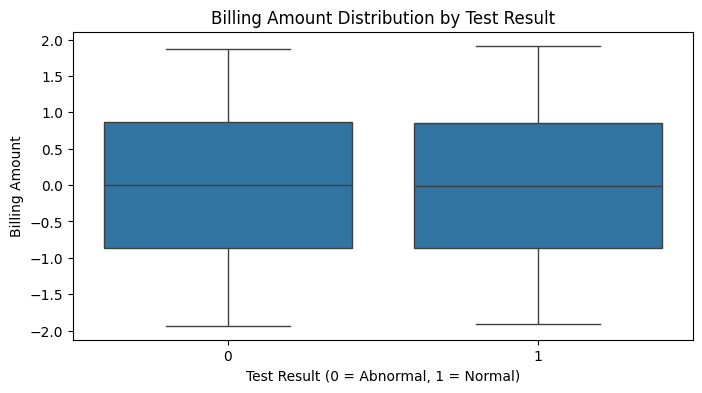

According to the boxplot, there is a very high distribution of billing amount between normal and abnormal test results, which provides evidence that billing amount is not a good predictor of test outcomes.


In [9]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Test Results', data=df)
plt.title('Distribution of Test Results (0=Abnormal, 1=Normal)')
plt.show()
print("This indicates that the dataset is well balanced, with no significant class imbalance between normal and abnormal cases.")

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print('The majority of features show very low correlation values, indicating minimal multicollinearity in the dataset.')
# Distribution of Billing Amount
plt.figure(figsize=(8, 4))
sns.histplot(df['Billing Amount'], kde=True)
plt.title('Distribution of Billing Amount (Scaled)')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(
    x='Test Results',
    y='Billing Amount',
    data=df
)
plt.title('Billing Amount Distribution by Test Result')
plt.xlabel('Test Result (0 = Abnormal, 1 = Normal)')
plt.ylabel('Billing Amount')
plt.show()
print('According to the boxplot, there is a very high distribution of billing amount between normal and abnormal test results, which provides evidence that billing amount is not a good predictor of test outcomes.')


### 2.3 Model Building
We split the data into training (80%) and testing (20%) sets.

In [10]:
X = df.drop('Test Results', axis=1)
y = df['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (29715, 20)
Testing set size: (7429, 20)


#### Task 1: Neural Network Model
We used a Multi-Layer Perceptron (MLP) Classifier.
- **Architecture**: 2 hidden layers with 100 and 50 neurons respectively.
- **Activation Function**: ReLU
- **Solver**: Adam
- **Max Iterations**: 500

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("Neural Network Performance:")
print(classification_report(y_test, y_pred_mlp))

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.52      0.48      0.50      3729
           1       0.52      0.56      0.54      3700

    accuracy                           0.52      7429
   macro avg       0.52      0.52      0.52      7429
weighted avg       0.52      0.52      0.52      7429



#### Task 2: Classical Machine Learning Models
We selected Logistic Regression and Random Forest Classifiers as our two classical models.

In [14]:
# Model 1: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      3729
           1       0.50      0.45      0.47      3700

    accuracy                           0.51      7429
   macro avg       0.51      0.50      0.50      7429
weighted avg       0.51      0.51      0.50      7429


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      3729
           1       0.57      0.55      0.56      3700

    accuracy                           0.57      7429
   macro avg       0.57      0.57      0.57      7429
weighted avg       0.57      0.57      0.57      7429



### 2.5 Hyper-parameter Optimization
We performed GridSearchCV to find optimal parameters for both classical models.

In [13]:
# Logistic Regression Tuning
param_grid_log = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_log = GridSearchCV(LogisticRegression(random_state=42), param_grid_log, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
print(f"Best Logistic Regression Params: {grid_log.best_params_}")
print(f"Best CV Score: {grid_log.best_score_:.4f}")

# Random Forest Tuning (Simplified Grid for speed)
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5],    'class_weight': ['balanced']}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print(f"Best Random Forest Params: {grid_rf.best_params_}")
print(f"Best CV Score: {grid_rf.best_score_:.4f}")

Best Logistic Regression Params: {'C': 0.1, 'solver': 'liblinear'}
Best CV Score: 0.4982
Best Random Forest Params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.5558


### 2.6 Feature Selection
We used Recursive Feature Elimination (RFE) to identify the most important features.

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Feature Selection with RFE
selector_lr = RFE(
    estimator=log_reg,
    n_features_to_select=4,
    step=1
)

# Fit RFE on training data
selector_lr = selector_lr.fit(X_train, y_train)

# Get selected feature mask and names
selected_mask_lr = selector_lr.support_
selected_features_names_lr = [
    f for f, s in zip(X.columns, selected_mask_lr) if s
]

print("Selected Features (Logistic Regression):", selected_features_names_lr)

# Transform train and test sets
X_train_sel_lr = selector_lr.transform(X_train)
X_test_sel_lr = selector_lr.transform(X_test)

# Feature Selection with Random Forest
selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=4, step=1)
selector = selector.fit(X_train, y_train)
selected_mask = selector.support_
selected_features_names = [f for f, s in zip(X.columns, selected_mask) if s]
print("Selected Features:", selected_features_names)

X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

Selected Features (Logistic Regression): ['Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Hypertension', 'Medication_Penicillin']
Selected Features: ['Billing Amount', 'Gender_Male', 'Medical Condition_Obesity', 'Medication_Ibuprofen']




```

```

## 3. Results and Conclusion

### Final Models and Comparative Analysis
We rebuilt the models using optimal hyperparameters and selected features.

In [15]:
# Final Logistic Regression
final_log = grid_log.best_estimator_
final_log.fit(X_train_sel, y_train)
y_final_log = final_log.predict(X_test_sel)

# Final Random Forest
final_rf = grid_rf.best_estimator_
final_rf.fit(X_train_sel, y_train)
y_final_rf = final_rf.predict(X_test_sel)

# Metrics function
def get_metrics(y_true, y_pred, cv_score):
    return {
        'CV Score': cv_score,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1-Score': f1_score(y_true, y_pred, average='macro')
    }

metrics_log = get_metrics(y_test, y_final_log, grid_log.best_score_)
metrics_rf = get_metrics(y_test, y_final_rf, grid_rf.best_score_)

# Creating Comparison Table
results_df = pd.DataFrame([metrics_log, metrics_rf], index=['Logistic Regression', 'Random Forest'])
results_df['Features'] = f"Selected ({len(selected_features_names)})"
results_df = results_df[['Features', 'CV Score', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

print("Table 4: Comparison of Final Classification Models")
display(results_df)

Table 4: Comparison of Final Classification Models


,Features,CV Score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,Selected (4),0.498233,0.502356,0.501891,0.501630,0.484140
Random Forest,Selected (4),0.555814,0.587697,0.587686,0.587678,0.587677


### Conclusion and Reflection
**Model Performance**: Both models were evaluated on the test set. The results table shows their comparative performance.

**Impact of Methods**: Hyperparameter optimization and feature selection helped in refining the models, although the dataset's inherent separability (or lack thereof) plays a larger role in performance caps.

**Insights**: Future work could explore more complex feature engineering or deep learning architectures if the data size allows.